In [1]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
# import data from local
#national_level_daily = pd.read_csv("../Data/Covid19/nation_level_daily.csv")
#patients_data = pd.read_csv("../Data/Covid19/patients_data.csv")
#district_level_latest = pd.read_csv("../Data/Covid19/district_level_latest.csv")
state_level_daily = pd.read_csv("../Data/Covid19/state_level_daily.csv")
#state_level_latest = pd.read_csv("../Data/Covid19/state_level_latest.csv")
#tests_day_wise = pd.read_csv("../Data/Covid19/tests_day_wise.csv")
#tests_state_wise = pd.read_csv("../Data/Covid19/tests_state_wise.csv")

# Show Data head

In [3]:
state_level_daily.head(2)

Unnamed: 0       Date State  Confirmed  Deceased  Recovered  \
0           0  01-Apr-20    AN          0         0          0   
1           1  01-Apr-20    AP         67         0          1   

                    State_Name  
0  Andaman and Nicobar Islands  
1               Andhra Pradesh

In [4]:
state_level_daily.drop(columns=["Unnamed: 0"],inplace=True)
state_level_daily.head(2)

Date State  Confirmed  Deceased  Recovered  \
0  01-Apr-20    AN          0         0          0   
1  01-Apr-20    AP         67         0          1   

                    State_Name  
0  Andaman and Nicobar Islands  
1               Andhra Pradesh

In [5]:
#check null values
state_level_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5694 entries, 0 to 5693
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        5694 non-null   object
 1   State       5694 non-null   object
 2   Confirmed   5694 non-null   int64 
 3   Deceased    5694 non-null   int64 
 4   Recovered   5694 non-null   int64 
 5   State_Name  5694 non-null   object
dtypes: int64(3), object(3)
memory usage: 267.0+ KB


In [6]:
#add day and month extracted from date
state_level_daily = pd.concat([state_level_daily,pd.DataFrame(np.array(state_level_daily.Date.map(lambda x: pd.to_datetime(x).dayofyear)),columns=["Day"])],axis = 1)
state_level_daily = pd.concat([state_level_daily,pd.DataFrame(np.array(state_level_daily.Date.map(lambda x: pd.to_datetime(x).month)),columns=["month"])],axis = 1)
state_level_daily

Date State  Confirmed  Deceased  Recovered  \
0     01-Apr-20    AN          0         0          0   
1     01-Apr-20    AP         67         0          1   
2     01-Apr-20    AR          0         0          0   
3     01-Apr-20    AS         15         0          0   
4     01-Apr-20    BR          3         0          0   
...         ...   ...        ...       ...        ...   
5689  31-May-20    TT       8789       222       4928   
5690  31-May-20    UN        448         0          0   
5691  31-May-20    UP        374         4        192   
5692  31-May-20    UT        158         0          0   
5693  31-May-20    WB        371         8        187   

                       State_Name  Day  month  
0     Andaman and Nicobar Islands   92      4  
1                  Andhra Pradesh   92      4  
2               Arunachal Pradesh   92      4  
3                           Assam   92      4  
4                           Bihar   92      4  
...                           ...  ...    ...  
5689                        Total  152      5  
5690             State Unassigned  152      5  
5691                Uttar Pradesh  152      5  
5692                  Uttarakhand  152      5  
5693                  West Bengal  152      5  

[5694 rows x 8 columns]

In [7]:
state_level_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5694 entries, 0 to 5693
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        5694 non-null   object
 1   State       5694 non-null   object
 2   Confirmed   5694 non-null   int64 
 3   Deceased    5694 non-null   int64 
 4   Recovered   5694 non-null   int64 
 5   State_Name  5694 non-null   object
 6   Day         5694 non-null   int64 
 7   month       5694 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 356.0+ KB


In [8]:
#create daywise data
daywisedata = pd.DataFrame(columns=["total_confirmed","total_decreased","total_recovered","Day","Date"])
u = list(state_level_daily.Day.unique())
u.sort()
for day in u:
    temp = state_level_daily[state_level_daily.Day == day]
    daywisedata = pd.concat(
        [daywisedata,pd.DataFrame(np.array([temp.Confirmed.sum(),temp.Deceased.sum(),temp.Recovered.sum(),day,temp.Date.iloc[0]]).reshape(1,-1),
        columns=["total_confirmed","total_decreased","total_recovered","Day","Date"])])
daywisedata.total_confirmed = daywisedata.total_confirmed.map(lambda x:int(x))
daywisedata.total_decreased = daywisedata.total_decreased.map(lambda x:int(x))
daywisedata.total_recovered = daywisedata.total_recovered.map(lambda x:int(x))
daywisedata.Day = daywisedata.Day.map(lambda x:int(x))


In [9]:
daywisedata

total_confirmed  total_decreased  total_recovered  Day       Date
0               162                4               18   74  14-Mar-20
0                54                0                8   75  15-Mar-20
0                30                0                2   76  16-Mar-20
0                22                2                2   77  17-Mar-20
0                74                0                0   78  18-Mar-20
..              ...              ...              ...  ...        ...
0            105344             1520            80710  215  02-Aug-20
0            100976             1612            86140  216  03-Aug-20
0            102564             1698           102440  217  04-Aug-20
0            102774             1608            79104  218  05-Aug-20
0            124340             1798           100282  219  06-Aug-20

[146 rows x 5 columns]

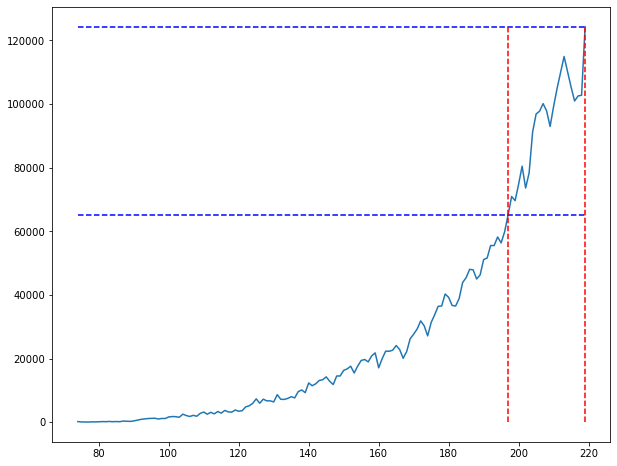

In [10]:
#Graph of confirm cases versues day
mpl.rcParams['figure.figsize'] = (10,8)
plt.plot(daywisedata.Day,daywisedata.total_confirmed)
plt.plot(daywisedata.Day,[daywisedata[daywisedata.total_confirmed >=60000].iloc[0].total_confirmed]*len(daywisedata.Day),"b--")
plt.plot(daywisedata.Day,[daywisedata[daywisedata.total_confirmed >=120000].iloc[0].total_confirmed]*len(daywisedata.Day),"b--")
plt.plot([daywisedata[daywisedata.total_confirmed >=60000].iloc[0].Day]*len(daywisedata.Day),daywisedata.total_confirmed,"r--")
plt.plot([daywisedata[daywisedata.total_confirmed >=120000].iloc[0].Day]*len(daywisedata.Day),daywisedata.total_confirmed,"r--")
plt.xlabel = "days"
plt.ylabel = "no. of confirm cases"
plt.show()

## Confirm cases become 2 times just in 22 days(show by red and blue dotted line)

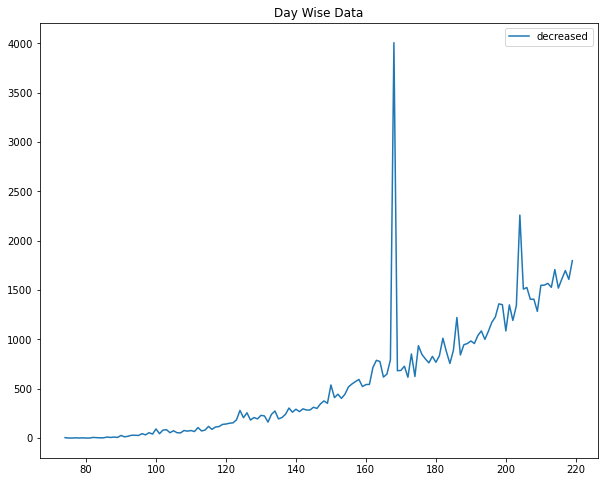

In [12]:
#Graph of decrease cases versues day
plt.plot(daywisedata.Day,daywisedata.total_decreased,label = "decreased")
plt.legend()
plt.title("Day Wise Data")
plt.show()

In [13]:
daywisedata.iloc[np.argmax(daywisedata.total_decreased)]

total_confirmed        22172
total_decreased         4008
total_recovered        14452
Day                      168
Date               16-Jun-20
Name: 0, dtype: object

# On june 16 2020 no of decrease cases are maximum
#### COVID-19 recovery rate high in Tamil Nadu, says CM K. Palaniswami
#### During the last 24 hours, 10,215 #COVID19 patients were cured. 
#### A total of 1,80,012 patients, so far, have been cured of COVID19. The recovery rate rises to 52.47%,
#### which is indicative of the fact that more than half of positive cases have recovered from the disease: MoH&FW

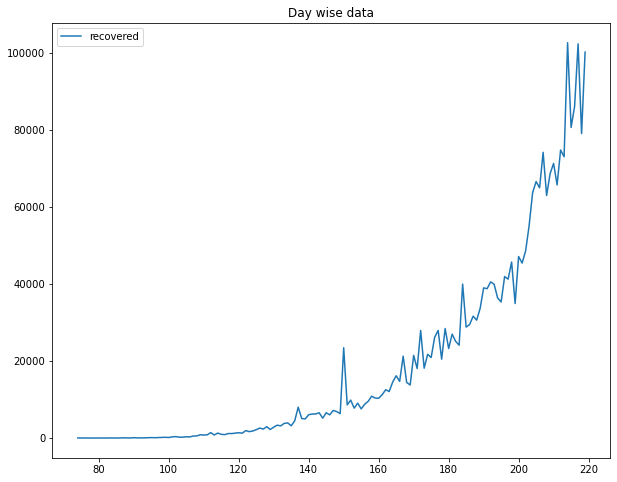

In [14]:
#Graph of recover cases versues day
plt.plot(daywisedata.Day,daywisedata.total_recovered,label = "recovered")
plt.legend()
plt.title("Day wise data")
plt.show()

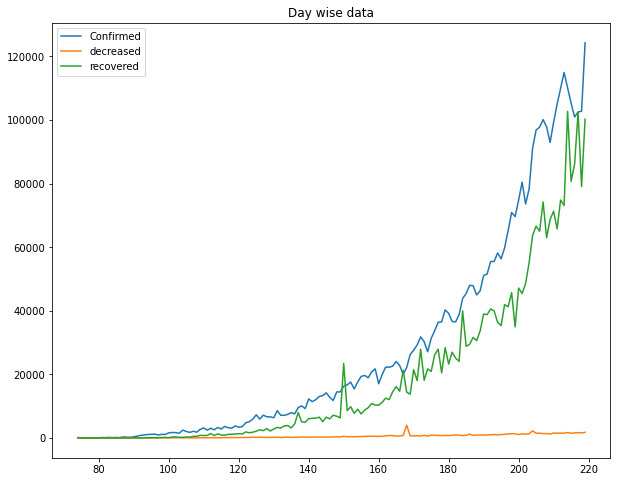

In [15]:
#Graph of all cases versues day
plt.plot(daywisedata.Day,daywisedata.total_confirmed,label = "Confirmed")
plt.plot(daywisedata.Day,daywisedata.total_decreased,label = "decreased")
plt.plot(daywisedata.Day,daywisedata.total_recovered,label = "recovered")
plt.legend()
plt.title("Day wise data")
plt.show()

## This show that no of decrease cases  almost become constant as compare to confirmed and recovered cases
## since the differencee between recover and confirmed cases are almost constant 

In [16]:
#create monthly data
monthwisedata = pd.DataFrame(columns=["total_confirmed","total_decreased","total_recovered","Month","Date"])
u = list(state_level_daily.month.unique())
u.sort()
for m in u:
    temp = state_level_daily[state_level_daily.month == m]
    monthwisedata = pd.concat(
        [monthwisedata,pd.DataFrame(np.array([temp.Confirmed.sum(),temp.Deceased.sum(),temp.Recovered.sum(),m,temp.Date.iloc[0]]).reshape(1,-1),
        columns=["total_confirmed","total_decreased","total_recovered","Month","Date"])])
monthwisedata.total_confirmed = monthwisedata.total_confirmed.map(lambda x:int(x))
monthwisedata.total_decreased = monthwisedata.total_decreased.map(lambda x:int(x))
monthwisedata.total_recovered = monthwisedata.total_recovered.map(lambda x:int(x))
monthwisedata.Month = monthwisedata.Month.map(lambda x:int(x))

In [17]:
monthwisedata

total_confirmed  total_decreased  total_recovered  Month       Date
0             3270               92              308      3  14-Mar-20
0            66463             2215            17810      4  01-Apr-20
0           311560             8504           165606      5  01-May-20
0           790088            24010           511956      6  01-Jun-20
0          2222546            38310          1495396      7  01-Jul-20
0           646232             9944           551412      8  01-Aug-20

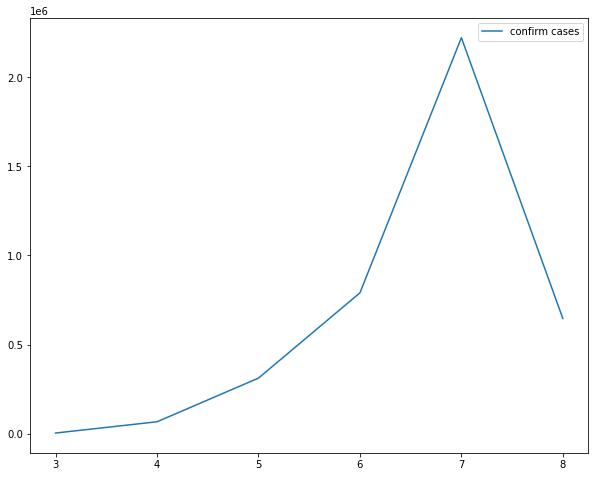

In [18]:
#graph of confirm cases vs month
plt.plot(monthwisedata.Month,monthwisedata.total_confirmed,label = "confirm cases")
plt.legend()
plt.show()

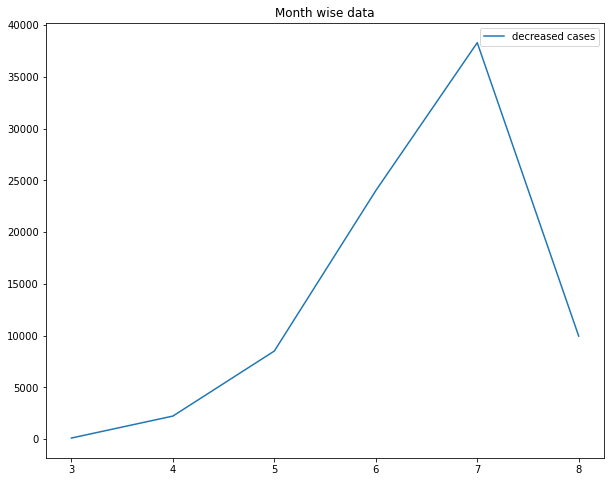

In [19]:
#graph of decrease cases vs month
plt.plot(monthwisedata.Month,monthwisedata.total_decreased,label = "decreased cases")
plt.legend()
plt.title("Month wise data")
plt.show()

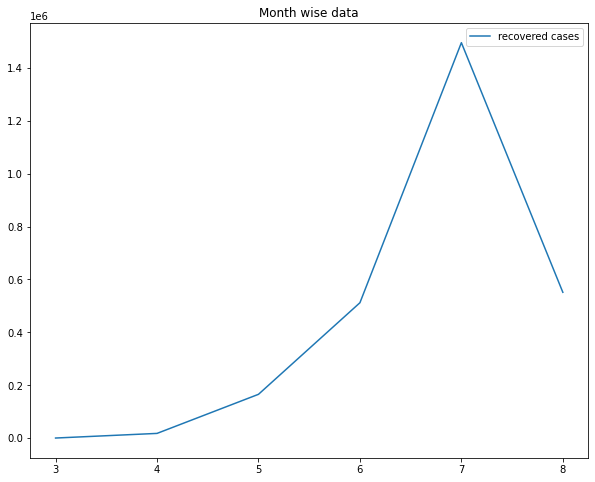

In [20]:
#graph of recovered cases vs month
plt.plot(monthwisedata.Month,monthwisedata.total_recovered,label = "recovered cases")
plt.legend()
plt.title("Month wise data")
plt.show()

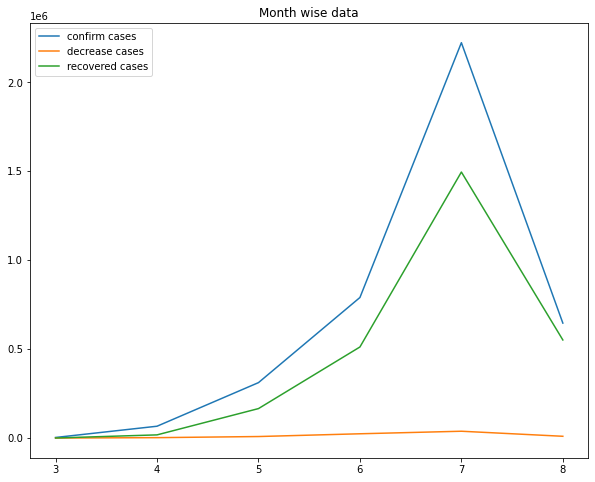

In [21]:
#graph of confirm cases vs month
plt.plot(monthwisedata.Month,monthwisedata.total_confirmed,label = "confirm cases")
plt.plot(monthwisedata.Month,monthwisedata.total_decreased,label = "decrease cases")
plt.plot(monthwisedata.Month,monthwisedata.total_recovered,label = "recovered cases")
plt.legend()
plt.title("Month wise data")
plt.show()

## Monthly cases are same as daywise cases

# Now analyse statewise data

In [88]:
#create state data
statewisedata = []
u = list(state_level_daily.State.unique())
for state in u:
    temp = state_level_daily[state_level_daily.State == state]
    statewisedata.append(temp)
statewisedata = list(map(lambda x: x.sort_values("Day"),statewisedata))
len(statewisedata)

39

## There are 39 states in our dataset

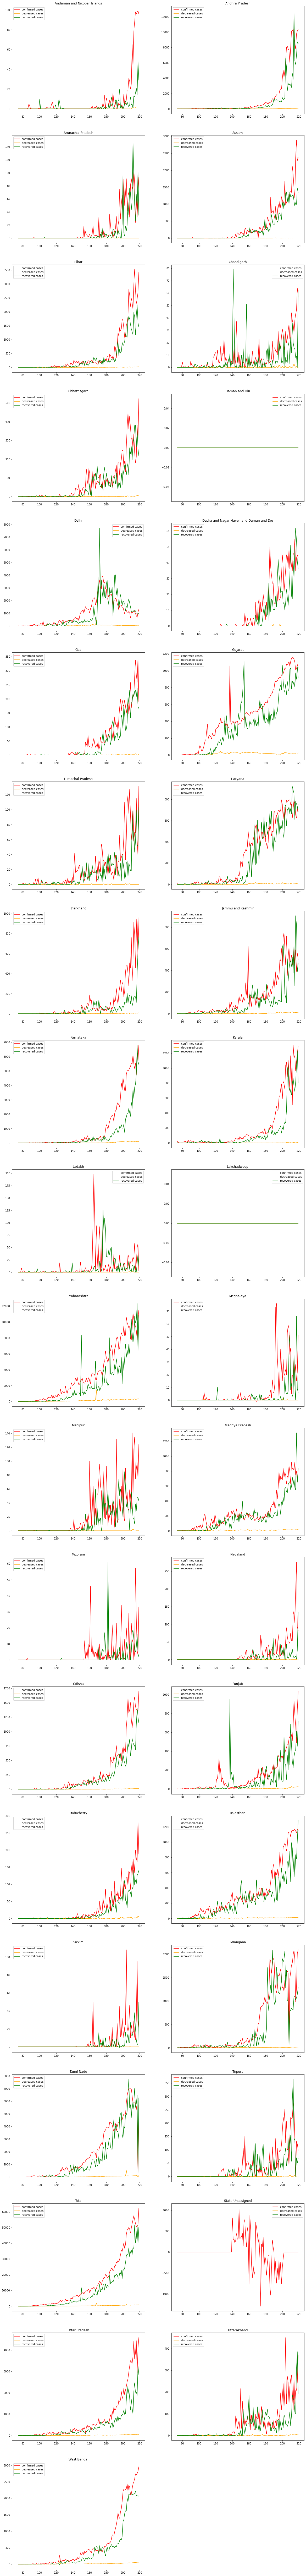

In [23]:
#cases of all states versus day
mpl.rcParams['figure.figsize'] = (20,180)
for x in range(len(statewisedata)):
    plt.subplot(20,2,x+1)
    plt.plot(statewisedata[x].Day,statewisedata[x].Confirmed,label = "confirmed cases",color = "red")
    plt.plot(statewisedata[x].Day,statewisedata[x].Deceased,label = "decreased cases",color = "orange")
    plt.plot(statewisedata[x].Day,statewisedata[x].Recovered,label = "recovered cases",color = "green")
    plt.legend()
    plt.title(statewisedata[x].State_Name.iloc[0])

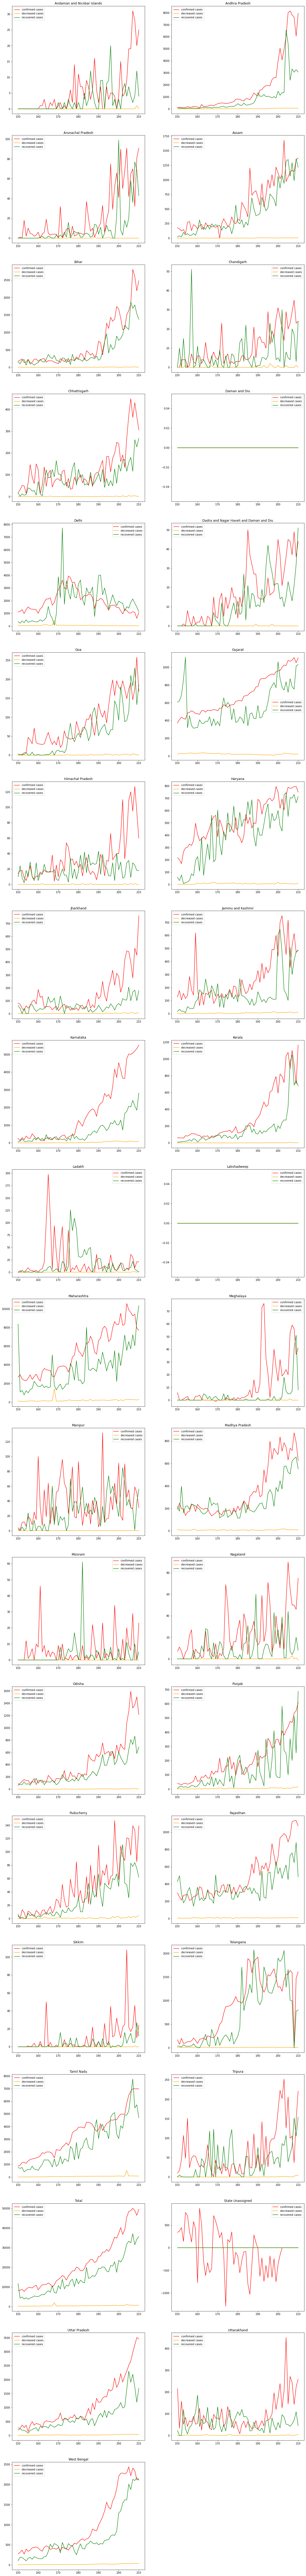

In [24]:
#cases of all states versus day between 150 - 210
mpl.rcParams['figure.figsize'] = (20,180)
avg_rate = {}
for x in range(len(statewisedata)):
    plt.subplot(20,2,x+1)
    temp = statewisedata[x][statewisedata[x].Day >=150]
    temp = temp[temp.Day <=210]
    plt.plot(temp.Day,temp.Confirmed,label = "confirmed cases",color = "red")
    plt.plot(temp.Day,temp.Deceased,label = "decreased cases",color = "orange")
    plt.plot(temp.Day,temp.Recovered,label = "recovered cases",color = "green")
    plt.legend()
    plt.title(temp.State_Name.iloc[0])
    avg_rate[temp.State_Name.iloc[0]] = [temp.Confirmed.sum(),temp.Deceased.sum(),temp.Recovered.sum()]

# In most states COVID-19 was extremly active between day 150(29-May-2020) to day 210 (28-July-2020)

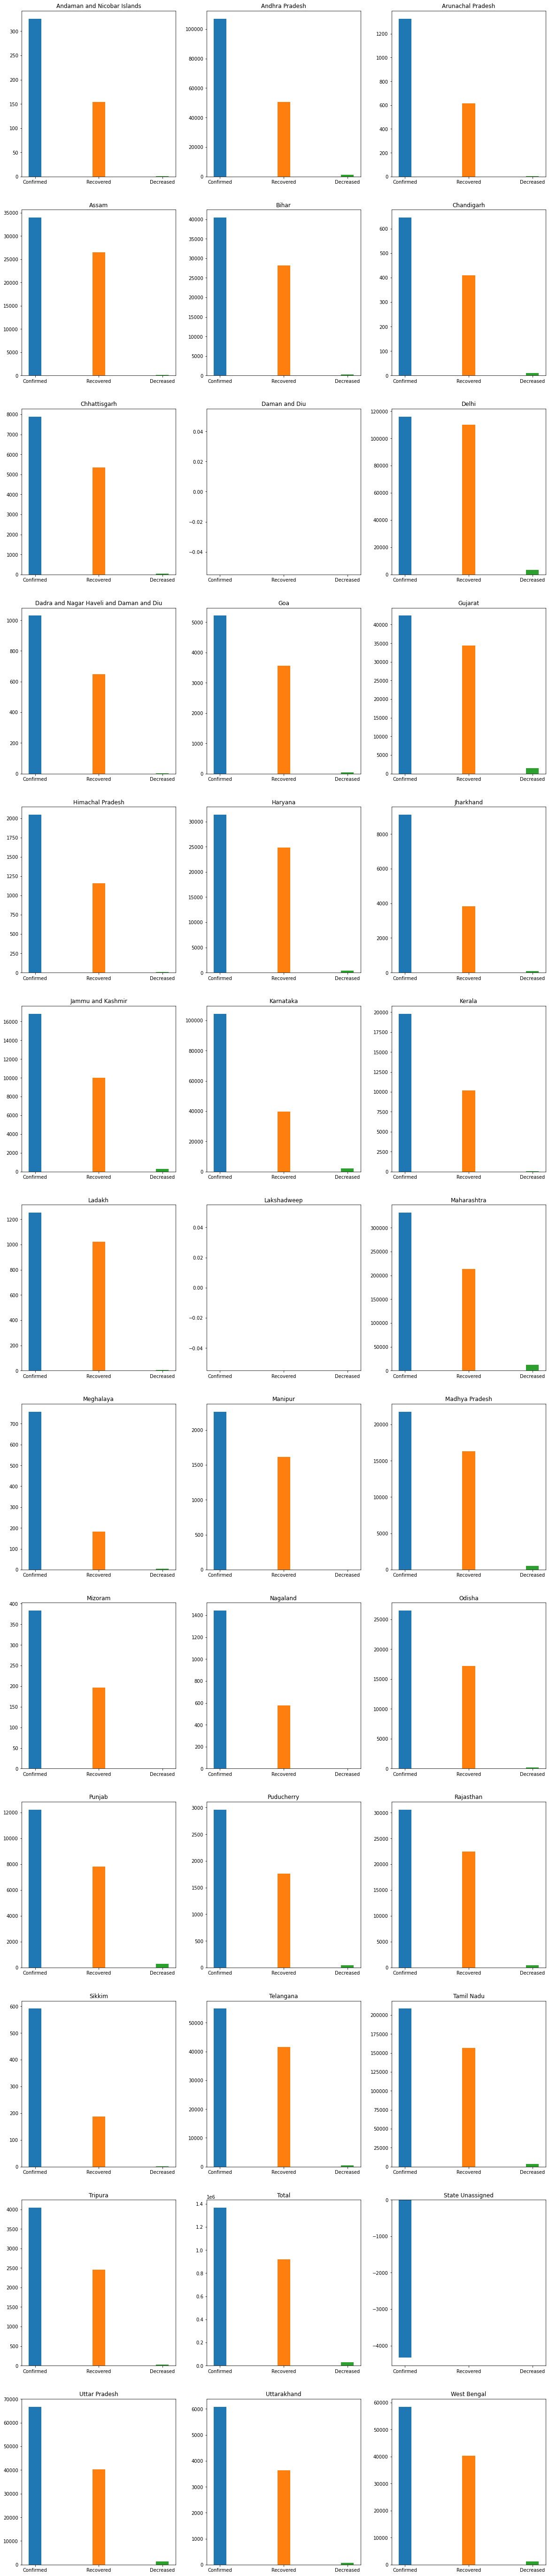

In [25]:
'''
mpl.rcParams['figure.figsize'] = (20,100)
c = 1
for x in avg_rate:
    plt.subplot(13,3,c)
    plt.bar(1,avg_rate[x][0],width=0.2)
    plt.bar(2,avg_rate[x][2],width=0.2)
    plt.bar(3,avg_rate[x][1],width=0.2)
    plt.title(x)
    plt.xticks([1,2,3],["Confirmed",'Recovered',"Decreased"])
    c=c+1
plt.show()
'''


In [77]:
#create dataframe for avg_rate for days 150- 210
avg_rate_df = pd.DataFrame(columns=["total_confirmed","total_decreased","total_recovered","state_name","state"])
for x in statewisedata:
    state = x.iloc[0].State
    state_name = x.iloc[0].State_Name
    t_c = avg_rate[state_name][0]
    t_d = avg_rate[state_name][1]
    t_r = avg_rate[state_name][2]
    avg_rate_df = pd.concat([avg_rate_df,pd.DataFrame(np.array([t_c,t_d,t_r,state_name,state]).reshape(1,-1),columns=["total_confirmed","total_decreased","total_recovered","state_name","state"])])
avg_rate_df.total_confirmed = avg_rate_df.total_confirmed.map(lambda x: int(x))
avg_rate_df.total_decreased = avg_rate_df.total_decreased.map(lambda x: int(x))
avg_rate_df.total_recovered = avg_rate_df.total_recovered.map(lambda x: int(x))
avg_rate_df.index = range(len(avg_rate_df))

In [89]:
avg_rate_df.head()

total_confirmed  total_decreased  total_recovered  \
0              326                1              154   
1           107052             1089            50489   
2             1327                3              616   
3            33965               89            26515   
4            40406              254            28170   

                    state_name state  decrease_rate  recovery_rate  
0  Andaman and Nicobar Islands    AN       0.003067       0.472393  
1               Andhra Pradesh    AP       0.010173       0.471631  
2            Arunachal Pradesh    AR       0.002261       0.464205  
3                        Assam    AS       0.002620       0.780657  
4                        Bihar    BR       0.006286       0.697174

In [82]:
avg_rate_df["decrease_rate"] = avg_rate_df.total_decreased/avg_rate_df.total_confirmed
avg_rate_df["recovery_rate"] = avg_rate_df.total_recovered/avg_rate_df.total_confirmed
avg_rate_df.dropna(inplace=True)
avg_rate_df.drop(avg_rate_df[avg_rate_df.state_name == "Total"].index,inplace=True)
avg_rate_df.drop(avg_rate_df[avg_rate_df.state_name == "State Unassigned"].index,inplace=True)


In [83]:
avg_rate_df.head(5)

total_confirmed  total_decreased  total_recovered  \
0              326                1              154   
1           107052             1089            50489   
2             1327                3              616   
3            33965               89            26515   
4            40406              254            28170   

                    state_name state  decrease_rate  recovery_rate  
0  Andaman and Nicobar Islands    AN       0.003067       0.472393  
1               Andhra Pradesh    AP       0.010173       0.471631  
2            Arunachal Pradesh    AR       0.002261       0.464205  
3                        Assam    AS       0.002620       0.780657  
4                        Bihar    BR       0.006286       0.697174

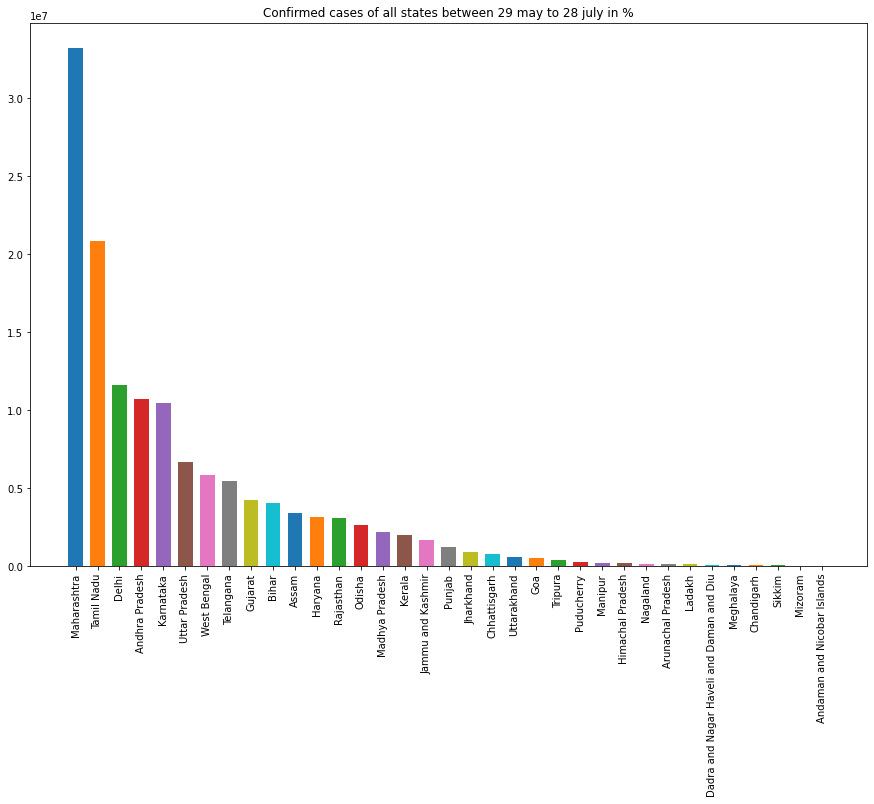

In [86]:
temp = avg_rate_df.sort_values("total_confirmed",ascending=False)
for x in range(len(temp.total_confirmed)):
    plt.bar((x)*1.5,(temp.total_confirmed.iloc[x]*100),width=1)
plt.xticks(np.array(range(len(temp.state_name)))*1.5,temp.state_name,rotation = 90)
plt.title("Confirmed cases of all states between 29 may to 28 july in %")
plt.show()

# now check recovery rate between these two month

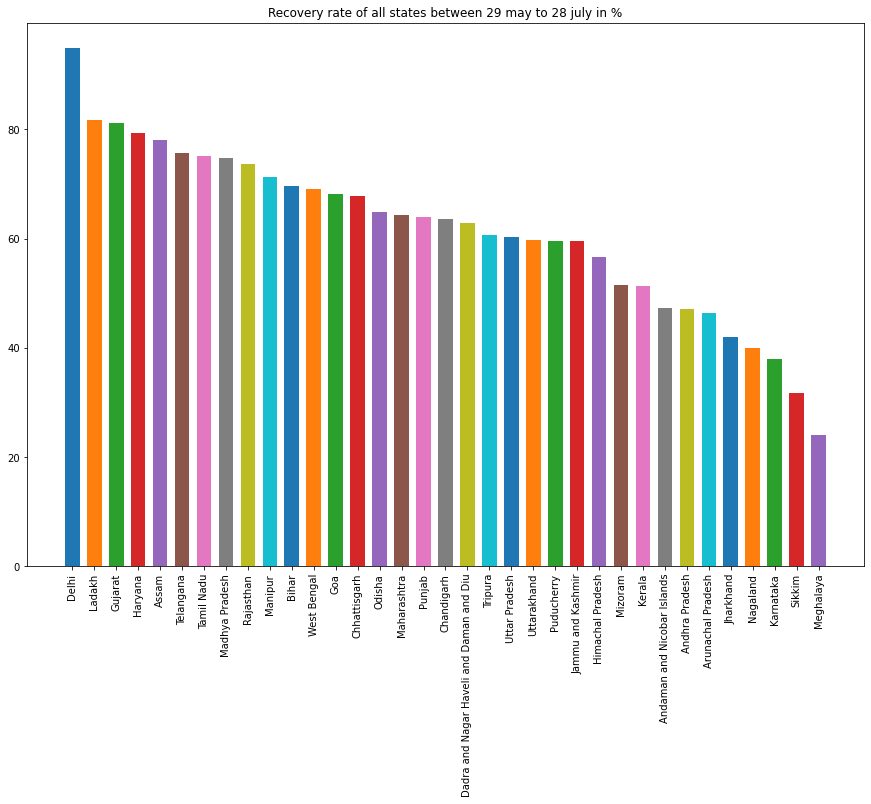

In [85]:
mpl.rcParams['figure.figsize'] = (15,10)
temp = avg_rate_df.sort_values("recovery_rate",ascending=False)
for x in range(len(temp.recovery_rate)):
    plt.bar((x)*1.5,(temp.recovery_rate.iloc[x]*100),width=1)
plt.xticks(np.array(range(len(temp.state_name)))*1.5,temp.state_name,rotation = 90)
plt.title("Recovery rate of all states between 29 may to 28 july in %")
plt.show()

In [105]:
#create dataframe of total cases for each state
stateWiseTotalCase = pd.DataFrame()
data = [[],[],[],[],[]]
for x in statewisedata:
    if x.iloc[0].State =="TT" or x.iloc[0].State =="UN":
        continue
    data[0].append(x.Confirmed.sum())
    data[1].append(x.Deceased.sum())
    data[2].append(x.Recovered.sum())
    data[3].append(x.iloc[0].State)
    data[4].append(x.iloc[0].State_Name)
stateWiseTotalCase = pd.DataFrame(columns=["total_confirmed","total_decreased","total_recovered","state","state_name"])
stateWiseTotalCase["total_confirmed"] = data[0]
stateWiseTotalCase["total_decreased"] = data[1]
stateWiseTotalCase["total_recovered"] = data[2]
stateWiseTotalCase["state"] = data[3]
stateWiseTotalCase["state_name"] = data[4]
stateWiseTotalCase.head()

total_confirmed  total_decreased  total_recovered state  \
0             1119               16              346    AN   
1           196789             1753           112870    AP   
2             1948                3             1245    AR   
3            52716              130            37225    AS   
4            68148              388            43820    BR   

                    state_name  
0  Andaman and Nicobar Islands  
1               Andhra Pradesh  
2            Arunachal Pradesh  
3                        Assam  
4                        Bihar

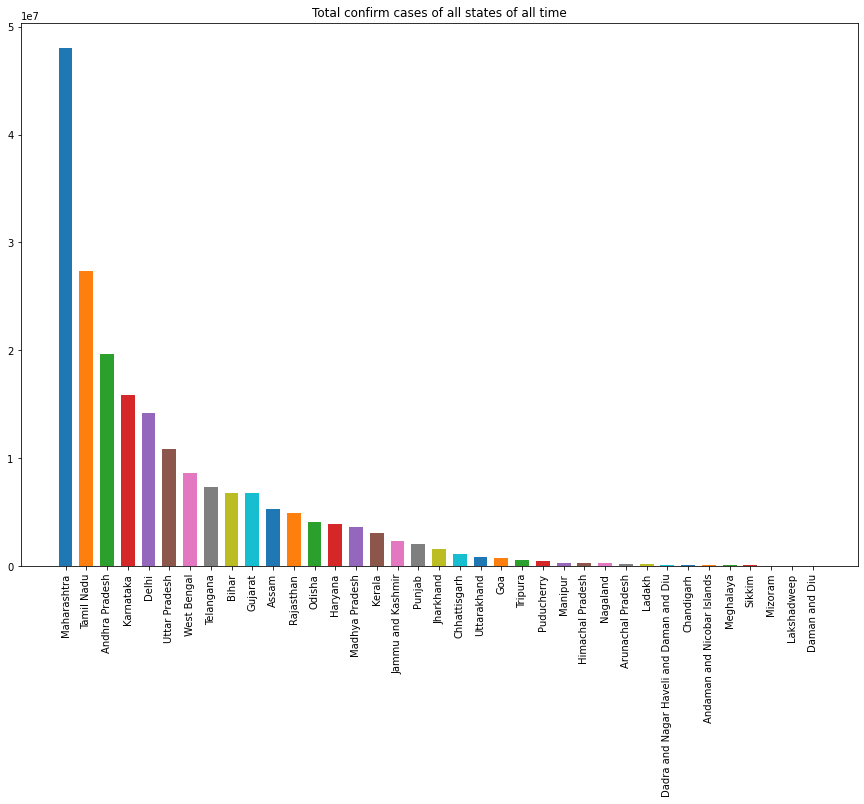

In [106]:
mpl.rcParams['figure.figsize'] = (15,10)
temp = stateWiseTotalCase.sort_values("total_confirmed",ascending=False)
for x in range(len(temp.total_confirmed)):
    plt.bar((x)*1.5,(temp.total_confirmed.iloc[x]*100),width=1)
plt.xticks(np.array(range(len(temp.state_name)))*1.5,temp.state_name,rotation = 90)
plt.title("Total confirm cases of all states of all time")
plt.show()